In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Loading the simulated output data from the PySD
data = pd.read_csv('SDOH-Chronic Disease Risk Factors.csv')

data = data.rename(columns={'Unnamed: 0': 'Year'})

# Specifying the target variable
target = 'Minority Population with Two or More Chronic Diseases'

# Implementing the features from the data
features = data.columns.drop(target)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions on the test set
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"{name}:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\n")

Decision Tree:
MAE: 93.75986994856068
MSE: 72017.51448028296
RMSE: 268.36079162255237

Random Forest:
MAE: 39.58653053344868
MSE: 18091.150328821193
RMSE: 134.50334690564839

Gradient Boosting:
MAE: 452.17879182511285
MSE: 401176.4543139683
RMSE: 633.3849179716615



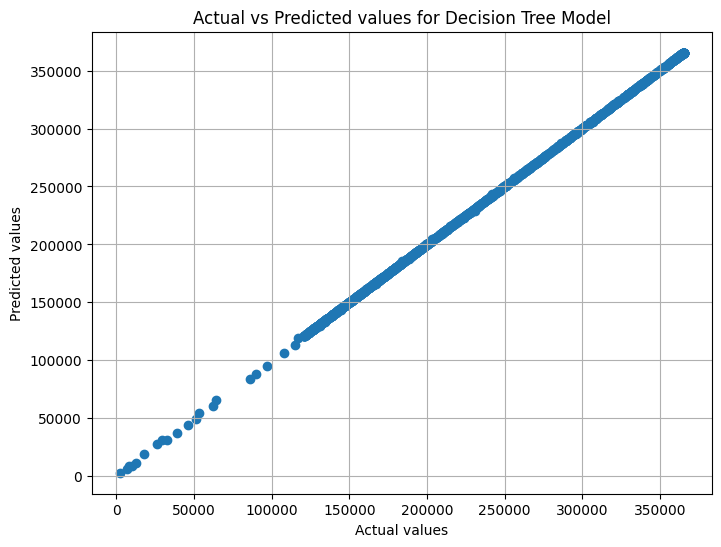

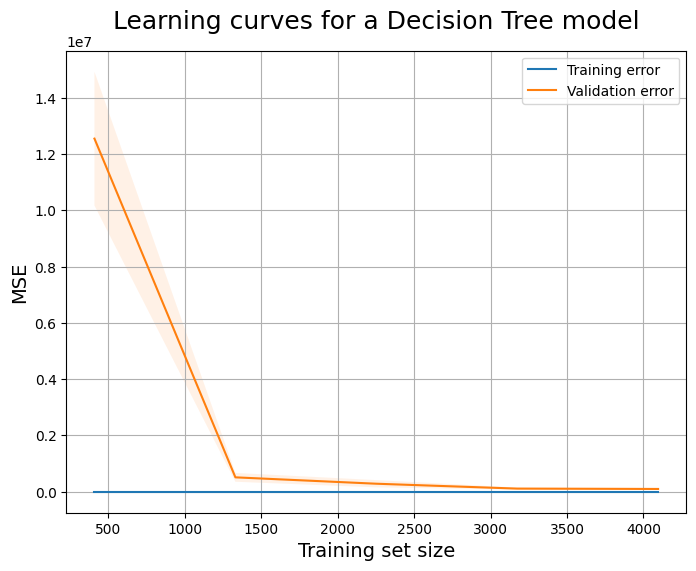

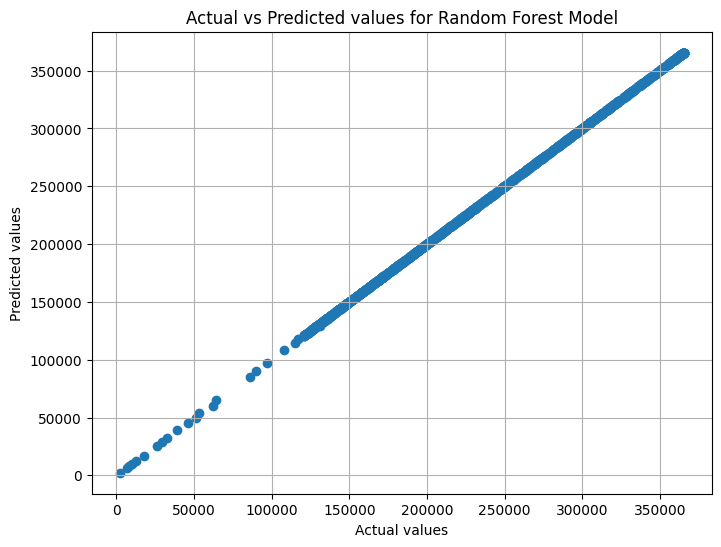

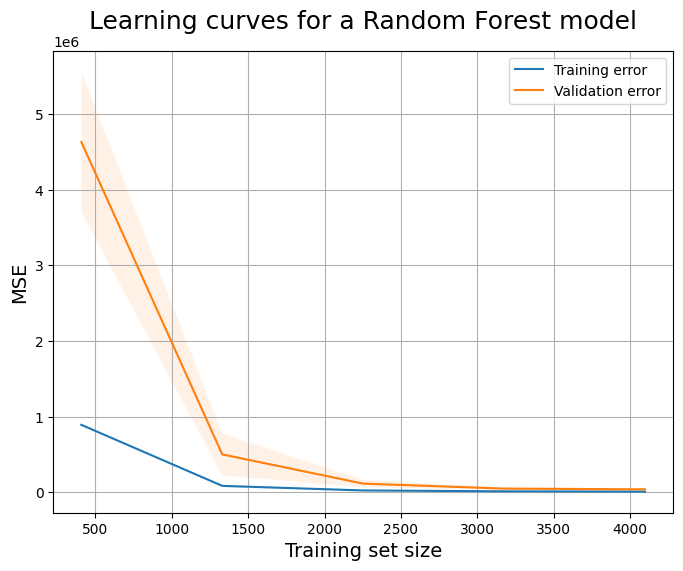

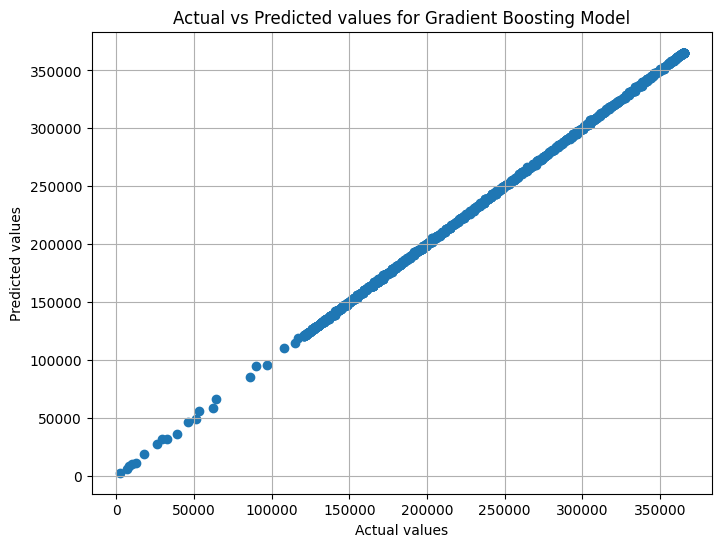

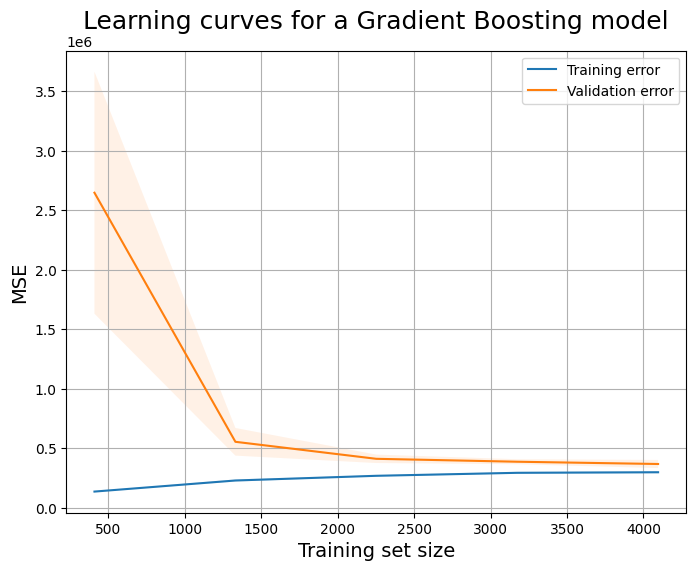

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Initialize the models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Generate predictions on the test set
    predictions = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(f'Actual vs Predicted values for {name} Model')
    plt.grid(True)
    plt.show()

    # Generate learning curves
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate mean and standard deviation for training set scores
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)

    # Calculate mean and standard deviation for validation set scores
    validation_scores_mean = -validation_scores.mean(axis=1)
    validation_scores_std = validation_scores.std(axis=1)

    # Plot the learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1)
    plt.ylabel('MSE', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title(f'Learning curves for a {name} model', fontsize=18, y=1.03)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, mean_squared_log_error, median_absolute_error, r2_score
import numpy as np

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions on the test set

    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    explained_variance = explained_variance_score(y_test, predictions)
    median_ae = median_absolute_error(y_test, predictions)

    # To avoid taking log of negative values, we ensure all values are positive
    if (min(y_test) > 0) and (min(predictions) > 0):
        msle = mean_squared_log_error(y_test, predictions)
    else:
        msle = 'undefined'

    print(f"{name}:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2: {r2}\nExplained Variance: {explained_variance}\nMedian AE: {median_ae}\nMSLE: {msle}\n")


Decision Tree:
MAE: 93.75986994856068
MSE: 72017.51448028296
RMSE: 268.36079162255237
R2: 0.9999883505746373
Explained Variance: 0.9999884814291379
Median AE: 41.61279730591923
MSLE: 0.0001085918749748409

Random Forest:
MAE: 39.58653053344868
MSE: 18091.150328821193
RMSE: 134.50334690564839
R2: 0.9999970736076217
Explained Variance: 0.9999971631608919
Median AE: 14.83112820921815
MSLE: 1.4253705703126963e-05

Gradient Boosting:
MAE: 452.17879182511285
MSE: 401176.4543139683
RMSE: 633.3849179716615
R2: 0.9999351064085515
Explained Variance: 0.9999351715563658
Median AE: 325.78519702813355
MSLE: 7.895738610233593e-05



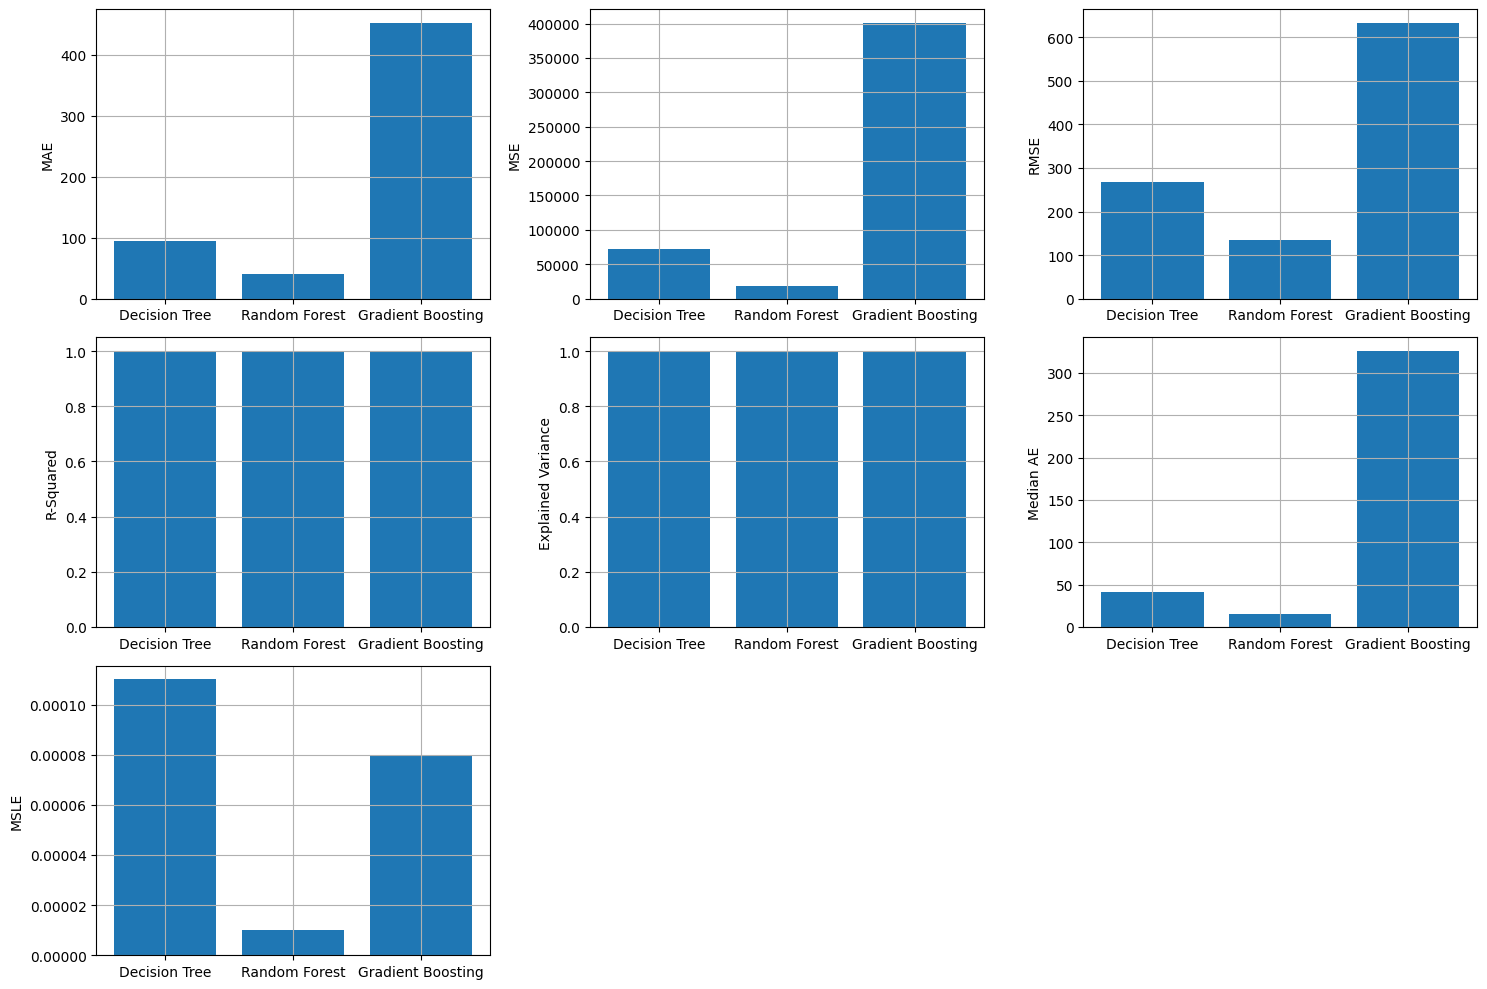

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

# Define the metrics for each model
metrics = {
    'MAE': [93.76, 39.59, 452.18],
    'MSE': [72017.51, 18091.15, 401176.45],
    'RMSE': [268.36, 134.50, 633.38],
    'R-Squared': [0.99999, 0.999997, 0.99994],
    'Explained Variance': [0.99999, 0.999997, 0.99994],
    'Median AE': [41.61, 14.83, 325.79],
    'MSLE': [0.00011, 0.00001, 0.00008]
}

# Creating a subplot for each metric
nrows = int(np.ceil(len(metrics) / 3))
fig, axs = plt.subplots(nrows, 3, figsize=(15, 10))
axs = axs.flatten()
x = np.arange(len(models))

for i, (metric, values) in enumerate(metrics.items()):
    axs[i].bar(x, values)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models)
    axs[i].set_ylabel(metric)
    axs[i].grid(True)

# Remove empty subplots
if len(metrics) % 3 != 0:
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()